<a href="https://colab.research.google.com/github/smendes801/ECGR4105/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sofia Mendes
*Student ID:  801259019*

*Assignment: Homework #*2

# Problem 1

a) Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables: area, bedrooms, bathrooms, stories, parking.

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (MSE) (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.


b) Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables: Area, bedrooms, bathrooms, stories, main road, guestroom, basement, hot water heating, air conditioning, parking, prefarea

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (MSE) (in a single graph, but two different lines) over your training iteration. Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## CSV/Data Processing ##

url = "https://raw.githubusercontent.com/smendes801/ECGR4105/refs/heads/main/Housing.csv"
hf = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(hf.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
def binary_mapping(x):
  return x.map({'no' : 0, 'yes' : 1})

def modelTrain(inputs, df_training, df_validation, y_train, y_valid, learning_rate, iterations):
    training_inputs = df_training[inputs]
    x_train = np.c_[np.ones((len(training_inputs), 1)), training_inputs]

    validation_inputs = df_validation[inputs]
    x_valid = np.c_[np.ones((len(validation_inputs), 1)), validation_inputs]

    n = x_train.shape[1]
    m_train = len(x_train)
    m_valid = len(x_valid)
    theta = np.zeros(n)

    train_losses = []
    valid_losses = []

    for i in range(iterations):
        h_theta = x_train.dot(theta)
        error = np.subtract(h_theta, y_train)
        gradient = (1 / m_train) * (x_train.transpose().dot(error))

        theta -= (learning_rate * gradient)

        train_loss = 1 / (2 * m_train) * np.sum(np.square((h_theta - y_train)))
        valid_loss = 1 / (2 * m_valid) * np.sum(np.square((x_valid.dot(theta) - y_valid)))

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

    return train_losses, valid_losses


variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

hf[variable_list] = hf[variable_list].apply(binary_mapping)

np.random.seed(0)
df_training, df_validation = train_test_split(hf, train_size = 0.8, test_size = 0.2, random_state = 100)

y_train = df_training.pop('price')
y_valid = df_validation.pop('price')

inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
learning_rate = 0.01
iterations = 50

trainLoss1A, validLoss1A = modelTrain(inputs, df_training, df_validation, y_train, y_valid, learning_rate, iterations)

inputs2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
inputs2 = df_training.columns.tolist()[:-1]

trainLoss1B, validLoss1B = modelTrain(inputs2, df_training, df_validation, y_train, y_valid, learning_rate, iterations)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)


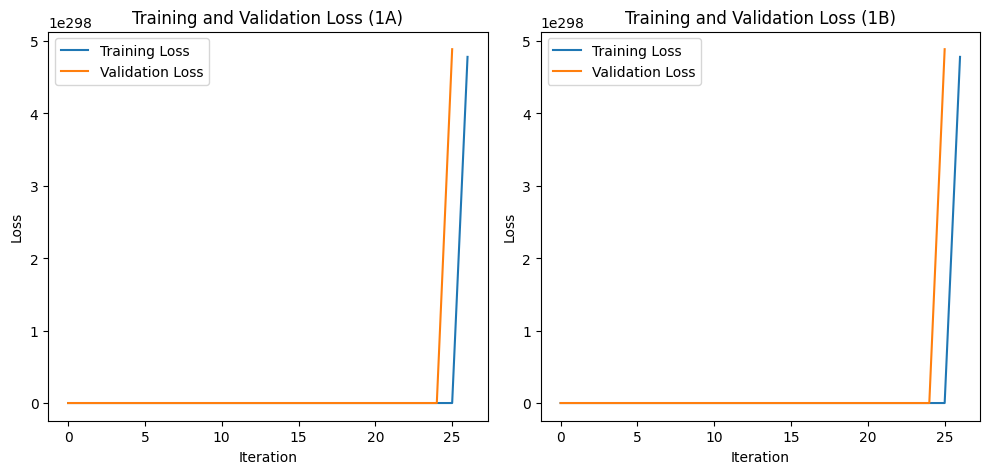

In [ ]:
# Create the plot figure and layout
plt.figure(figsize=(10, 5))

# First subplot for trainLoss1A and validLoss1A
plt.subplot(1, 2, 1)
plt.plot(trainLoss1A, label="Training Loss")
plt.plot(validLoss1A, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss (1A)")

# Second subplot for trainLoss1B and validLoss1B
plt.subplot(1, 2, 2)
plt.plot(trainLoss1B, label="Training Loss")
plt.plot(validLoss1B, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss (1B)")

# Adjust the layout
plt.tight_layout()
plt.show()

# Problem 2

a) Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization.

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.


b) Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization.

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## CSV/Data Processing ##

url = "https://raw.githubusercontent.com/smendes801/ECGR4105/refs/heads/main/Housing.csv"
hf = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(hf.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
# Binary mapping for categorical variables
variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_mapping(x):
    return x.map({'no': 0, 'yes': 1})

hf[variable_list] = hf[variable_list].apply(binary_mapping)
hf = hf.drop('furnishingstatus', axis=1)

# Split the data into training and validation sets
np.random.seed(1)
df_training, df_validation = train_test_split(hf, train_size=0.8, test_size=0.2, random_state=100)

# Normalize and Standardize the data
normalize = MinMaxScaler()
std_scale = StandardScaler()

norm_training = pd.DataFrame(normalize.fit_transform(df_training), columns=df_training.columns)
norm_validation = pd.DataFrame(normalize.transform(df_validation), columns=df_validation.columns)

std_training = pd.DataFrame(std_scale.fit_transform(df_training), columns=df_training.columns)
std_validation = pd.DataFrame(std_scale.transform(df_validation), columns=df_validation.columns)

# Non-feature scaled Outputs
y_train = df_training.pop('price')
y_valid = df_validation.pop('price')

# Normalized Outputs
norm_y_train = norm_training.pop('price')
norm_y_valid = norm_validation.pop('price')

# Standardized Outputs
std_y_train = std_training.pop('price')
std_y_valid = std_validation.pop('price')

# Function to train the model
def train_model(inputs, x_training, x_validation, y_train, y_valid, learning_rate, iterations):
    training_inputs = x_training[inputs]
    x_train = np.c_[np.ones((len(training_inputs), 1)), training_inputs]

    validation_inputs = x_validation[inputs]
    x_valid = np.c_[np.ones((len(validation_inputs), 1)), validation_inputs]

    n = x_train.shape[1]
    m_train = len(x_train)
    m_valid = len(x_valid)
    theta = np.zeros(n)

    train_losses = []
    valid_losses = []

    for i in range(iterations):
        h_theta = x_train.dot(theta)
        error = h_theta - y_train
        gradient = (1 / m_train) * (x_train.T.dot(error))

        theta -= (learning_rate * gradient)

        train_loss = 1 / (2 * m_train) * np.sum(np.square(h_theta - y_train))
        valid_loss = 1 / (2 * m_valid) * np.sum(np.square(x_valid.dot(theta) - y_valid))

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

    return train_losses, valid_losses

# Set inputs and hyperparameters
inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
learning_rates = [0.1, 0.05, 0.01]
iterations = 250

# Training with normalized inputs
norm_train_losses = []
norm_valid_losses = []
std_train_losses = []
std_valid_losses = []

In [ ]:
inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
learning_rates = [0.1, 0.05, 0.01]
iterations = 250

# Training with normalized inputs
norm_train_losses = []
norm_valid_losses = []
std_train_losses = []
std_valid_losses = []

for lr in learning_rates:
    norm_train_loss, norm_valid_loss = train_model(inputs, norm_training, norm_validation, y_train, y_valid, lr, iterations)
    norm_train_losses.append(norm_train_loss)
    norm_valid_losses.append(norm_valid_loss)

    std_train_loss, std_valid_loss = train_model(inputs, std_training, std_validation, y_train, y_valid, lr, iterations)
    std_train_losses.append(std_train_loss)
    std_valid_losses.append(std_valid_loss)

# Include all inputs except for furnishingstatus
inputs = hf.columns.tolist()  # Use all columns now
inputs.remove('price')

# Training with normalized and standardized inputs with all inputs
unscaledNorm_train_losses = []
unscaledNorm_valid_losses = []
norm_train_losses = []
norm_valid_losses = []
unscaledStd_train_losses = []
unscaledStd_valid_losses = []
std_train_losses = []
std_valid_losses = []

for lr in learning_rates:
    unscaledNorm_train_loss, unscaledNorm_valid_loss = train_model(inputs, norm_training, norm_validation, y_train, y_valid, lr, iterations)
    unscaledNorm_train_losses.append(unscaledNorm_train_loss)
    unscaledNorm_valid_losses.append(unscaledNorm_valid_loss)

    norm_train_loss, norm_valid_loss = train_model(inputs, norm_training, norm_validation, norm_y_train, norm_y_valid, lr, iterations)
    norm_train_losses.append(norm_train_loss)
    norm_valid_losses.append(norm_valid_loss)

    unscaledStd_train_loss, unscaledStd_valid_loss = train_model(inputs, std_training, std_validation, y_train, y_valid, lr, iterations)
    unscaledStd_train_losses.append(unscaledStd_train_loss)
    unscaledStd_valid_losses.append(unscaledStd_valid_loss)

    std_train_loss, std_valid_loss = train_model(inputs, std_training, std_validation, norm_y_train, norm_y_valid, lr, iterations)
    std_train_losses.append(std_train_loss)
    std_valid_losses.append(std_valid_loss)


In [ ]:
# Include all inputs except for furnishingstatus
inputs = hf.columns.tolist()  # Use all columns now
inputs.remove('price')

# Training with normalized and standardized inputs with all inputs
unscaledNorm_train_losses = []
unscaledNorm_valid_losses = []
norm_train_losses = []
norm_valid_losses = []
unscaledStd_train_losses = []
unscaledStd_valid_losses = []
std_train_losses = []
std_valid_losses = []

for lr in learning_rates:
    unscaledNorm_train_loss, unscaledNorm_valid_loss = train_model(inputs, norm_training, norm_validation, y_train, y_valid, lr, iterations)
    unscaledNorm_train_losses.append(unscaledNorm_train_loss)
    unscaledNorm_valid_losses.append(unscaledNorm_valid_loss)

    norm_train_loss, norm_valid_loss = train_model(inputs, norm_training, norm_validation, norm_y_train, norm_y_valid, lr, iterations)
    norm_train_losses.append(norm_train_loss)
    norm_valid_losses.append(norm_valid_loss)

    unscaledStd_train_loss, unscaledStd_valid_loss = train_model(inputs, std_training, std_validation, y_train, y_valid, lr, iterations)
    unscaledStd_train_losses.append(unscaledStd_train_loss)
    unscaledStd_valid_losses.append(unscaledStd_valid_loss)

    std_train_loss, std_valid_loss = train_model(inputs, std_training, std_validation, norm_y_train, norm_y_valid, lr, iterations)
    std_train_losses.append(std_train_loss)
    std_valid_losses.append(std_valid_loss)


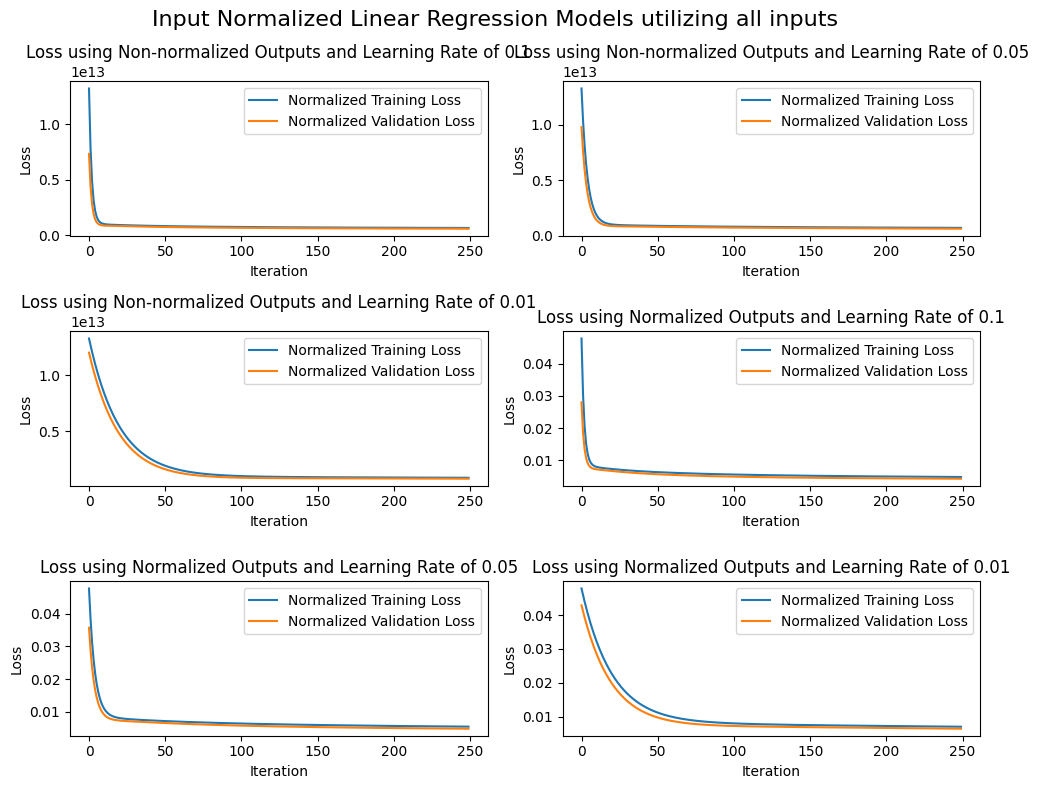

In [ ]:
# Plot the losses for unscaled normalized outputs
plt.figure(figsize=(10, 8))
plt.suptitle('Input Normalized Linear Regression Models utilizing all inputs', fontsize=16)

for i, lr in enumerate(learning_rates):
    plt.subplot(3, 2, i + 1)
    plt.plot(unscaledNorm_train_losses[i], label="Normalized Training Loss")
    plt.plot(unscaledNorm_valid_losses[i], label="Normalized Validation Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Loss using Non-normalized Outputs and Learning Rate of {lr}")

    plt.subplot(3, 2, i + 4)
    plt.plot(norm_train_losses[i], label="Normalized Training Loss")
    plt.plot(norm_valid_losses[i], label="Normalized Validation Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Loss using Normalized Outputs and Learning Rate of {lr}")

plt.tight_layout()
plt.show()

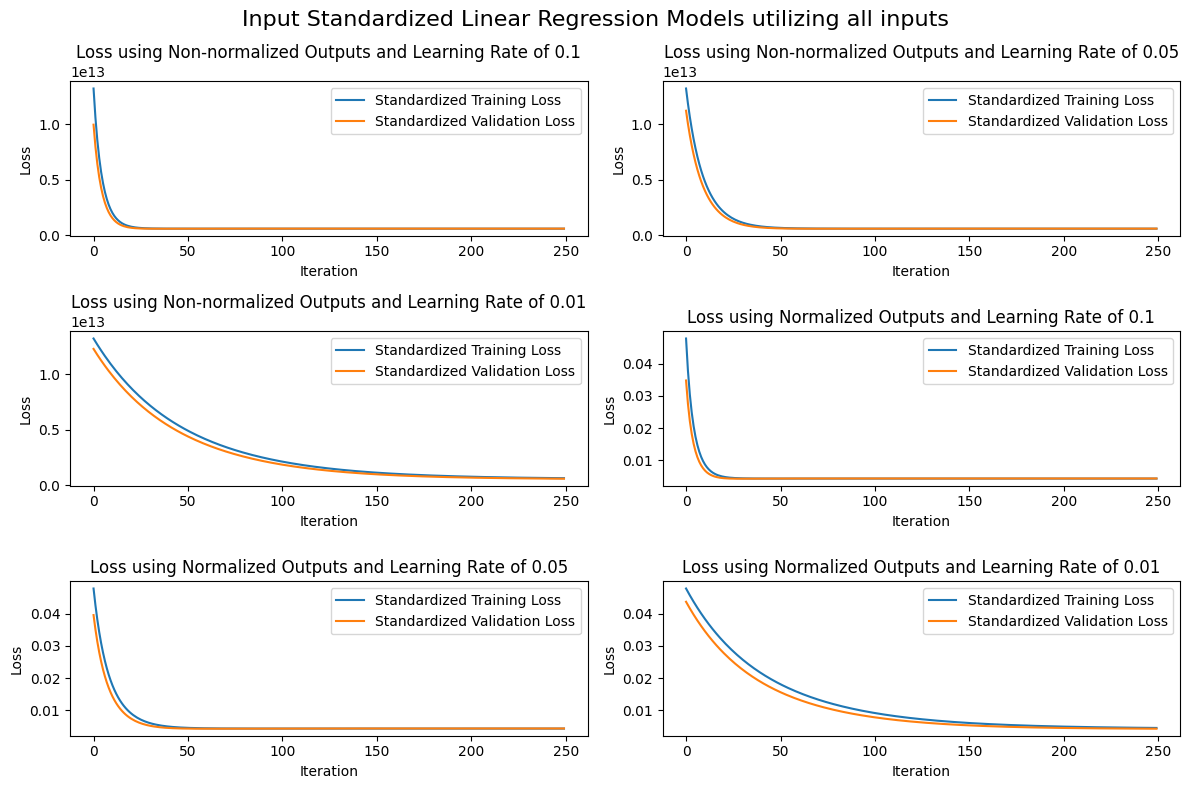

In [ ]:
# Plot the losses for unscaled standardized outputs
plt.figure(figsize=(12, 8))
plt.suptitle('Input Standardized Linear Regression Models utilizing all inputs', fontsize=16)

for i, lr in enumerate(learning_rates):
    plt.subplot(3, 2, i + 1)
    plt.plot(unscaledStd_train_losses[i], label="Standardized Training Loss")
    plt.plot(unscaledStd_valid_losses[i], label="Standardized Validation Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Loss using Non-normalized Outputs and Learning Rate of {lr}")

    plt.subplot(3, 2, i + 4)
    plt.plot(std_train_losses[i], label="Standardized Training Loss")
    plt.plot(std_valid_losses[i], label="Standardized Validation Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Loss using Normalized Outputs and Learning Rate of {lr}")

plt.tight_layout()
plt.show()

# Problem 3

a) Repeat problem 2 a, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change the equation to compute MSE loss for the training and evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2a.

b) Repeat problem 2 b, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic (parameter update equations), but you don’t need to change the equation to compute MSE loss for the training and evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## CSV/Data Processing ##

url = "https://raw.githubusercontent.com/smendes801/ECGR4105/refs/heads/main/Housing.csv"
hf = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(hf.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
# Binary mapping function
def binary_mapping(df, variable_list):
    df[variable_list] = df[variable_list].apply(lambda x: x.map({'no': 0, 'yes': 1}))
    return df

# Preprocessing function
def preprocess_data(df):
    variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
    df = binary_mapping(df, variable_list)
    df = df.drop('furnishingstatus', axis=1)
    return df

# Preprocess the data
hf = preprocess_data(hf)

# Data Splitting
df_training, df_validation = train_test_split(hf, train_size=0.8, test_size=0.2, random_state=100)

# Scaling Function
def scale_data(train_data, valid_data):
    minmax_scaler = MinMaxScaler()
    std_scaler = StandardScaler()

    norm_train = pd.DataFrame(minmax_scaler.fit_transform(train_data), columns=train_data.columns)
    norm_valid = pd.DataFrame(minmax_scaler.transform(valid_data), columns=valid_data.columns)

    std_train = pd.DataFrame(std_scaler.fit_transform(train_data), columns=train_data.columns)
    std_valid = pd.DataFrame(std_scaler.transform(valid_data), columns=valid_data.columns)

    return norm_train, norm_valid, std_train, std_valid

# Scale the data
norm_training, norm_validation, std_training, std_validation = scale_data(df_training, df_validation)

# Prepare output variables
y_train = df_training.pop('price')
y_valid = df_validation.pop('price')

# Model Training
def train_model(inputs, x_training, x_validation, y_train, y_valid, learning_rate, lambd, iterations):
    x_train = np.c_[np.ones((len(x_training), 1)), x_training[inputs].values]
    x_valid = np.c_[np.ones((len(x_validation), 1)), x_validation[inputs].values]

    n = x_train.shape[1]
    m_train = len(x_train)
    m_valid = len(x_valid)
    theta = np.zeros(n)

    train_losses = []
    valid_losses = []

    for i in range(iterations):
        h_theta = x_train.dot(theta)
        error = h_theta - y_train.values
        gradient = (1 / m_train) * (x_train.T.dot(error))

        # Update theta with regularization
        theta = theta * (1 - learning_rate * (lambd / m_train)) - (learning_rate * gradient)

        # Calculate losses
        train_loss = (1 / (2 * m_train)) * np.sum(np.square(error))
        valid_loss = (1 / (2 * m_valid)) * np.sum(np.square(x_valid.dot(theta) - y_valid.values))

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

    return train_losses, valid_losses, theta

# Plotting Function
def plot_losses(norm_losses, std_losses, learning_rates):
    plt.figure(figsize=(10, 8))
    plt.suptitle('Linear Regression Model Losses', fontsize=16)

    for i, lr in enumerate(learning_rates):
        plt.subplot(3, 2, i * 2 + 1)
        plt.plot(norm_losses[i][0], label="Normalized Training Loss")
        plt.plot(norm_losses[i][1], label="Normalized Validation Loss")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.legend()
        plt.title(f"Loss with Normalized Inputs and Learning Rate {lr}")

        plt.subplot(3, 2, i * 2 + 2)
        plt.plot(std_losses[i][0], label="Standardized Training Loss")
        plt.plot(std_losses[i][1], label="Standardized Validation Loss")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.legend()
        plt.title(f"Loss with Standardized Inputs and Learning Rate {lr}")

    plt.tight_layout()
    plt.show()

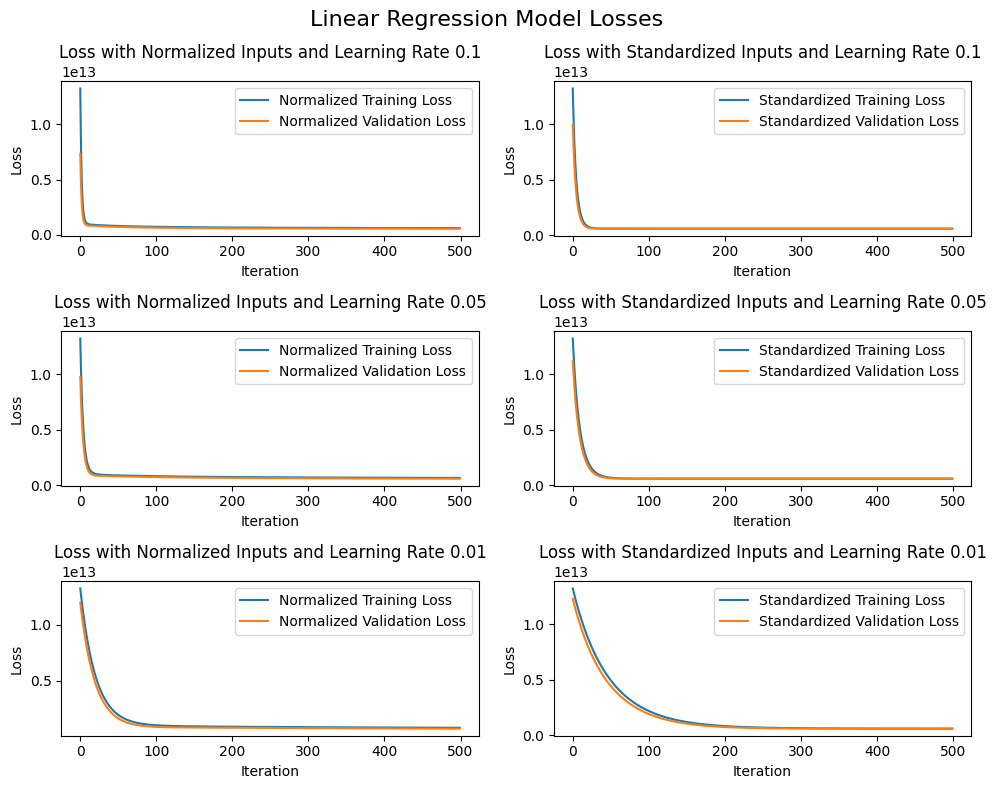

In [ ]:
# Learning rates to test
learning_rates = [0.1, 0.05, 0.01]
lambd = 5
iterations = 500

# Store losses
norm_losses = []
std_losses = []

for lr in learning_rates:
    norm_losses.append(train_model(df_training.columns.tolist(), norm_training, norm_validation, y_train, y_valid, lr, lambd, iterations))
    std_losses.append(train_model(df_training.columns.tolist(), std_training, std_validation, y_train, y_valid, lr, lambd, iterations))

# Plot losses
plot_losses(norm_losses, std_losses, learning_rates)